In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import torch
import torchvision

import pandas as pd
import numpy as np
import seaborn as sns 
import albumentations as A
import matplotlib.pyplot as plt

from tqdm.cli import tqdm
from pathlib import Path
from sklearn.model_selection import StratifiedKFold
from src.data import EyeDataset
from src.utils import load_splits
from src.utils import custom_to_std_tensor
from src.utils import denormalize
from src.utils import eye_blend

In [3]:
data_folder = Path("data")
folds_folder = Path("folds")

test_df = pd.read_csv(data_folder / "test.csv")
train_df, val_df = load_splits(folds_folder)

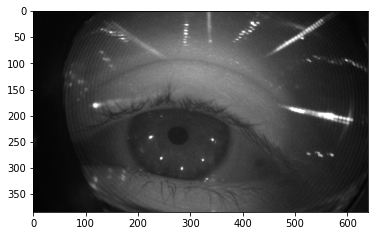

In [7]:
transfrom = A.Compose([
#     A.Resize(100, 100),
    A.Resize(384,  640),
    A.HorizontalFlip(),
    custom_to_std_tensor,
])

dataset = EyeDataset(test_df, "test", transfrom)
img, *_ = dataset[5]

img_arr = np.array(torchvision.transforms.functional.to_pil_image(denormalize(img)))

plt.figure(figsize=(6, 10))
plt.imshow(img_arr, cmap="gray")

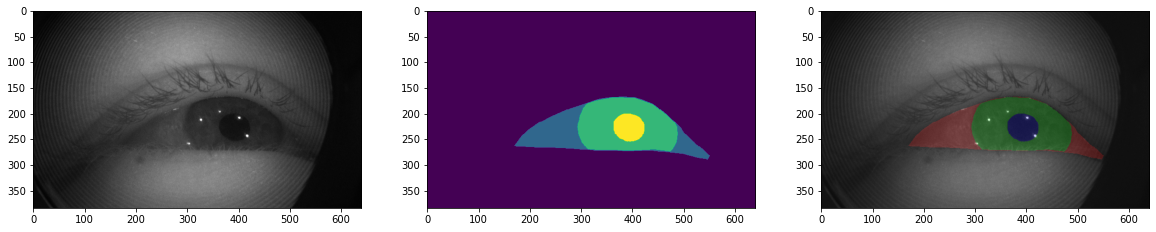

In [8]:
transform = A.Compose([
#     A.Resize(100, 100),
    A.Resize(384,  640),
    A.HorizontalFlip(),
    custom_to_std_tensor,
])

dataset = EyeDataset(train_df, "train", transform)

img, mask = dataset[3]

img_arr = np.array(torchvision.transforms.functional.to_pil_image(denormalize(img)))

mask_arr = mask.numpy()
blend = eye_blend(img, mask)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_arr, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(mask_arr)
plt.subplot(1, 3, 3)
plt.imshow(blend)